In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm, trange

In [2]:
sensor_df = pd.read_csv('dataset/tgr_sensor.csv')
sensor_df['day'] = sensor_df.apply(
    lambda row: pd.Timestamp(row['timestamp']).dayofyear, axis=1)
sensor_df['timestamp'] = pd.to_datetime(sensor_df['timestamp'])

In [3]:
sensor_df.head()

,Unnamed: 0,DevEUI,lat,lng,row_id,sensor,team_id,timestamp,day
0,0,AA00DBCA14EF1401,13.082194,100.918190,-LwbQeapATZOLMfdiNaw,13,1,2019-12-21 14:49:20,355
1,1,AA00DBCA14EF1401,13.082194,100.918190,-LwbS1T0wp_duvhTIWtv,13,1,2019-12-21 14:55:20,355
2,2,AA00DBCA14EF1401,13.082194,100.918190,-LwbSO-4gjvnwY5RWWOL,14,1,2019-12-21 14:56:52,355
3,3,AA00DBCA14EF1401,13.112661,100.937904,-LwbSQXUbD9thOCE86Ic,14,1,2019-12-21 14:57:02,355
4,4,AA00DBCA14EF1401,13.082194,100.918190,-LwbSm3LpnnrN_Y4PQju,12,1,2019-12-21 14:58:35,355


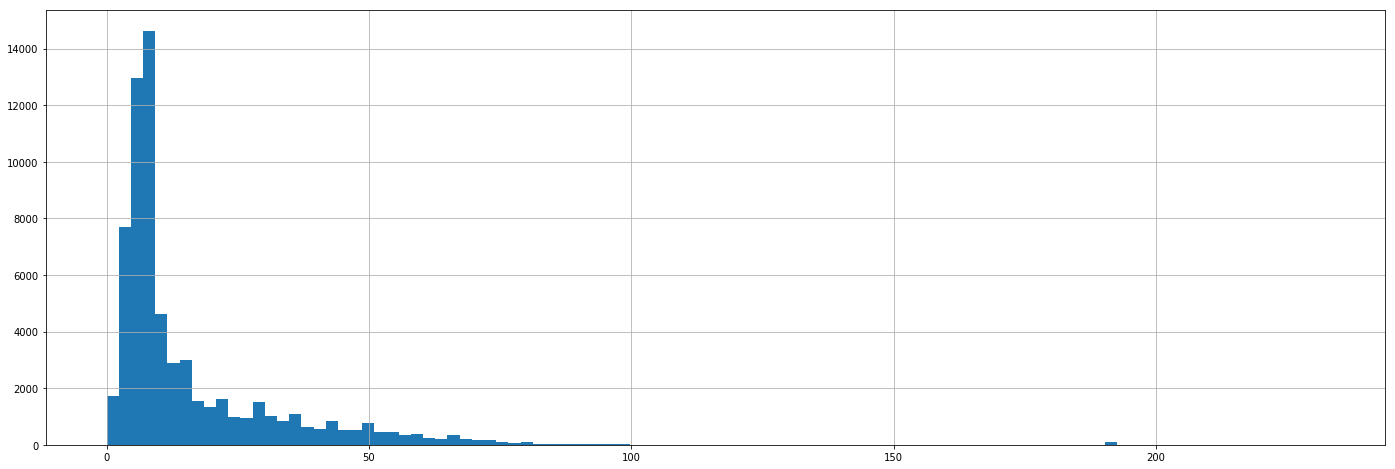

In [5]:
sensor_df['sensor'].hist(figsize=(24,8), bins=100)

In [6]:
sensor_df['sensor'].describe()

count    65875.000000
mean        15.794398
std         17.830834
min          0.000000
25%          6.000000
50%          8.000000
75%         19.000000
max        232.000000
Name: sensor, dtype: float64

# Count day

In [7]:
count_day = sensor_df.groupby(['DevEUI']).apply(lambda row: row['day'].drop_duplicates().count())

In [8]:
count_day

DevEUI
AA00DBCA14EF1401     4
AA00DBCA14EF1403     4
AA00DBCA14EF1406    19
AA00DBCA14EF1407     8
AA00DBCA14EF1414     1
AA00DBCA14EF1418     3
AA00DBCA14EF1420     8
AA00DBCA14EF1421     6
AA00DBCA14EF1422     4
AA00DBCA14EF1426    11
AA00DBCA14EF1430     4
AA00DBCA14EF1432     8
AA00DBCA14EF1433    10
dtype: int64

In [9]:
sensor_df[['team_id','DevEUI']].sort_values('DevEUI').drop_duplicates()

,team_id,DevEUI
0,1,AA00DBCA14EF1401
45881,3,AA00DBCA14EF1403
32259,2,AA00DBCA14EF1406
45975,6,AA00DBCA14EF1406
49307,7,AA00DBCA14EF1407
49499,14,AA00DBCA14EF1414
49574,18,AA00DBCA14EF1418
52059,20,AA00DBCA14EF1420
56587,32,AA00DBCA14EF1420
52334,21,AA00DBCA14EF1421


# Trend

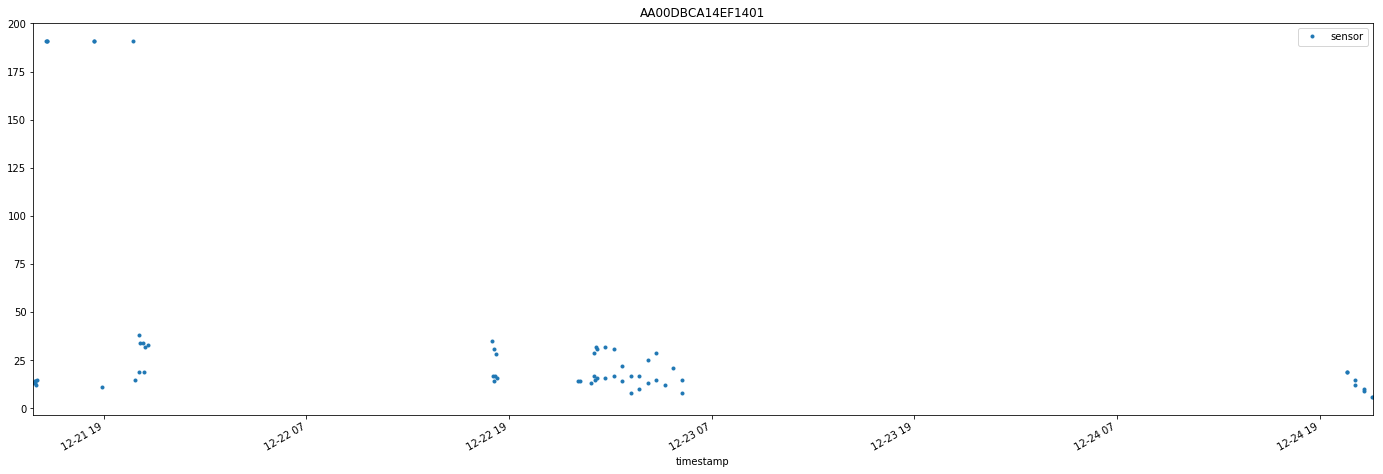

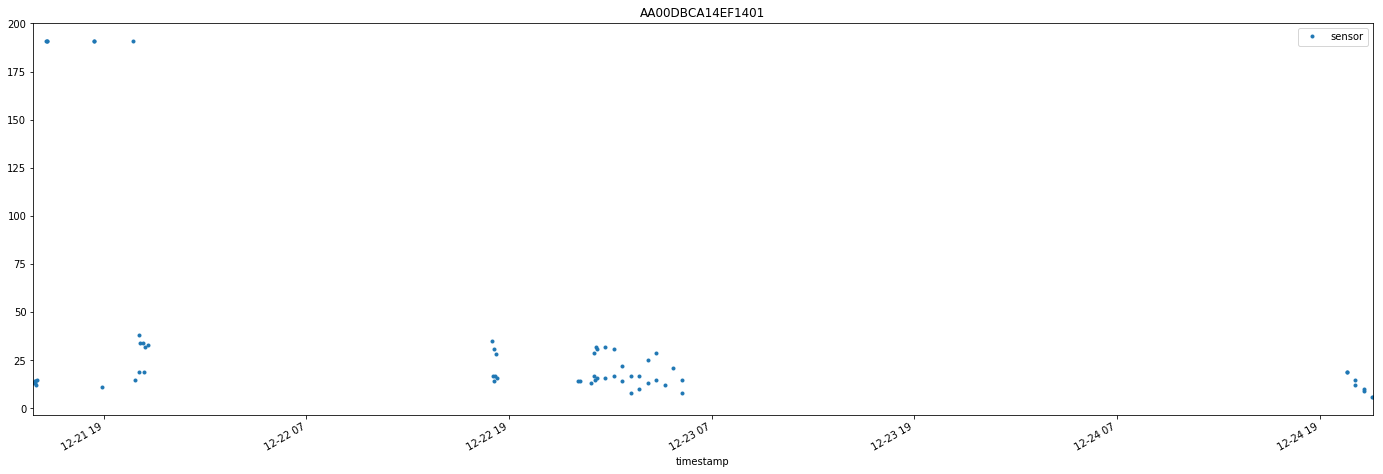

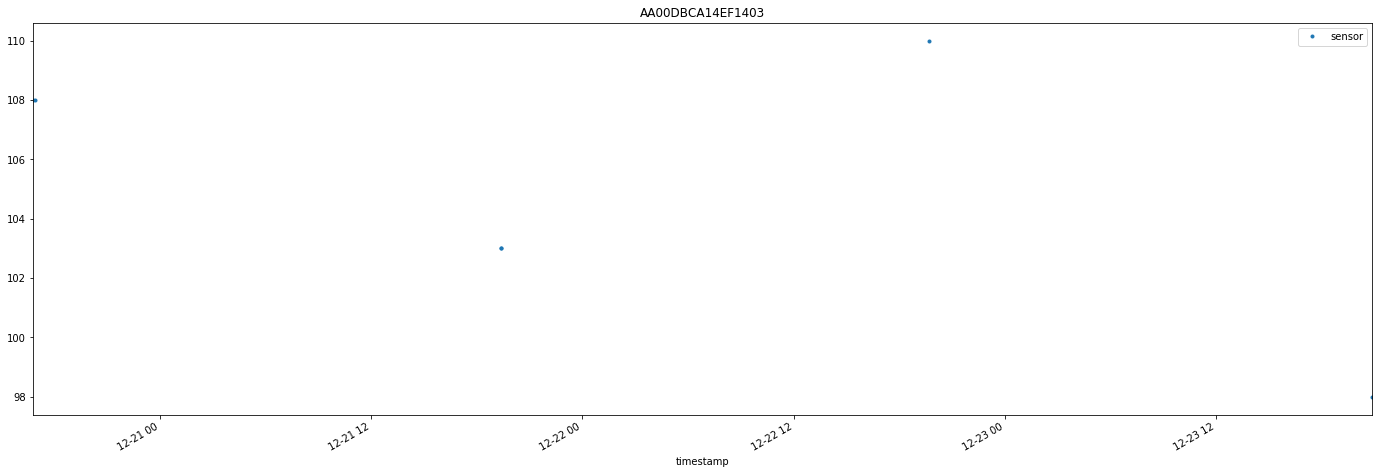

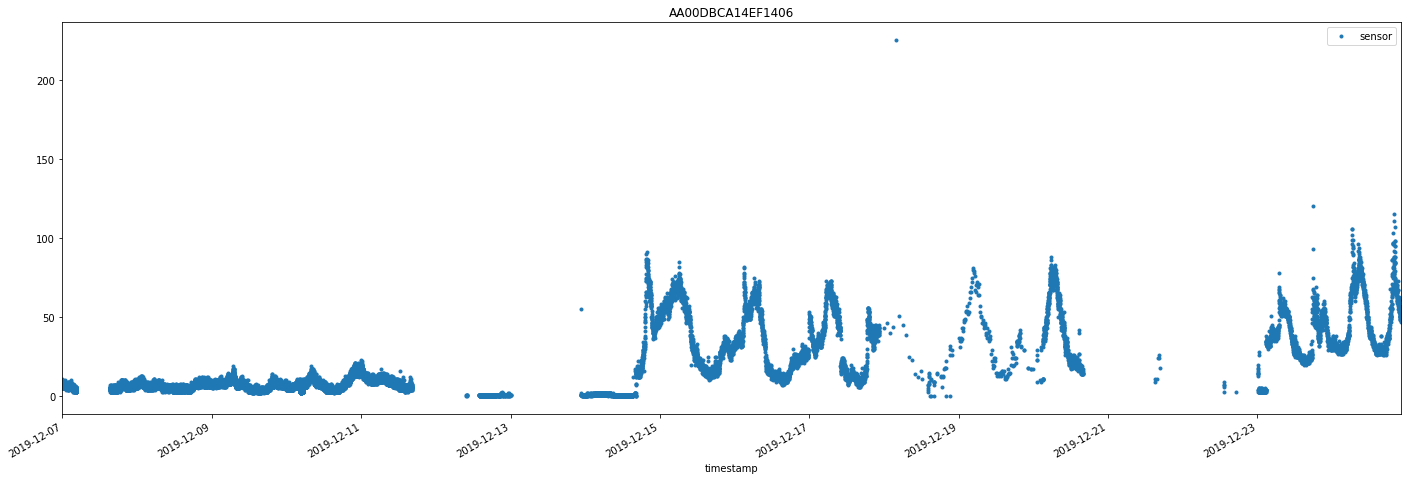

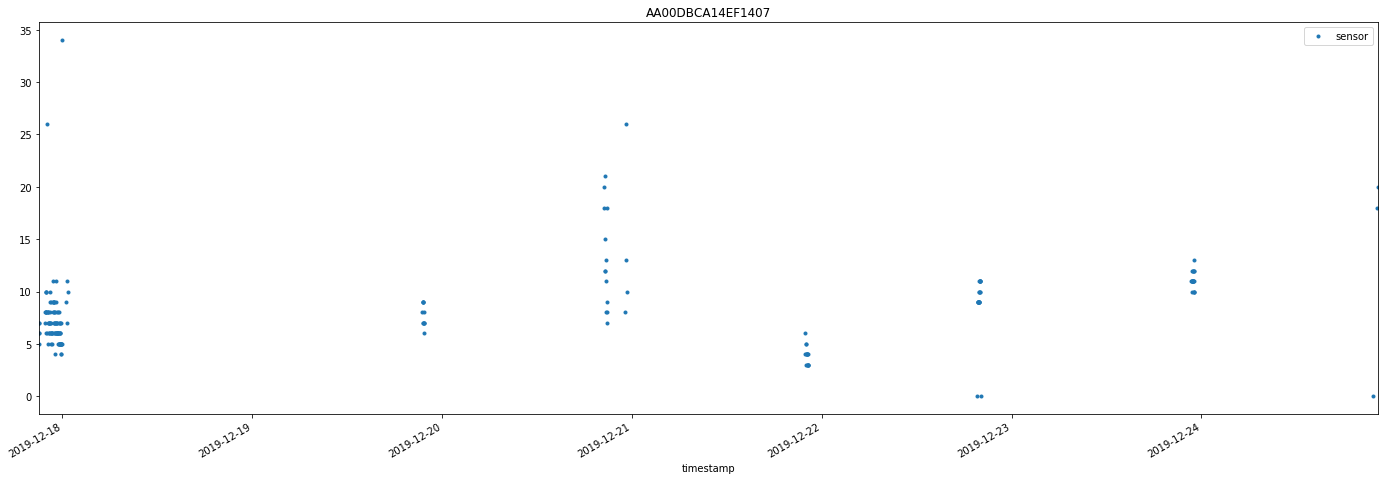

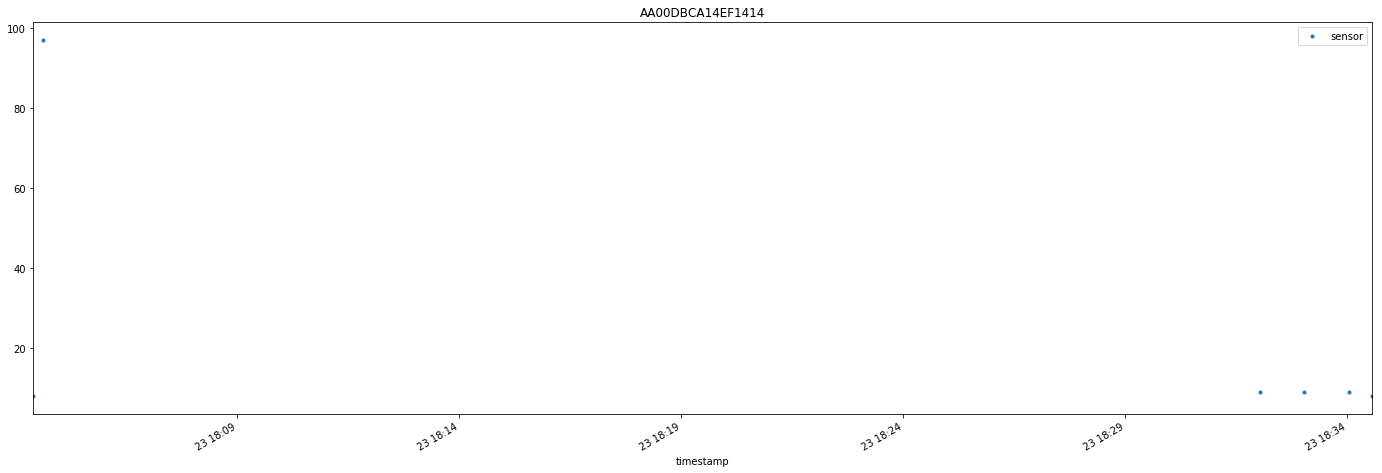

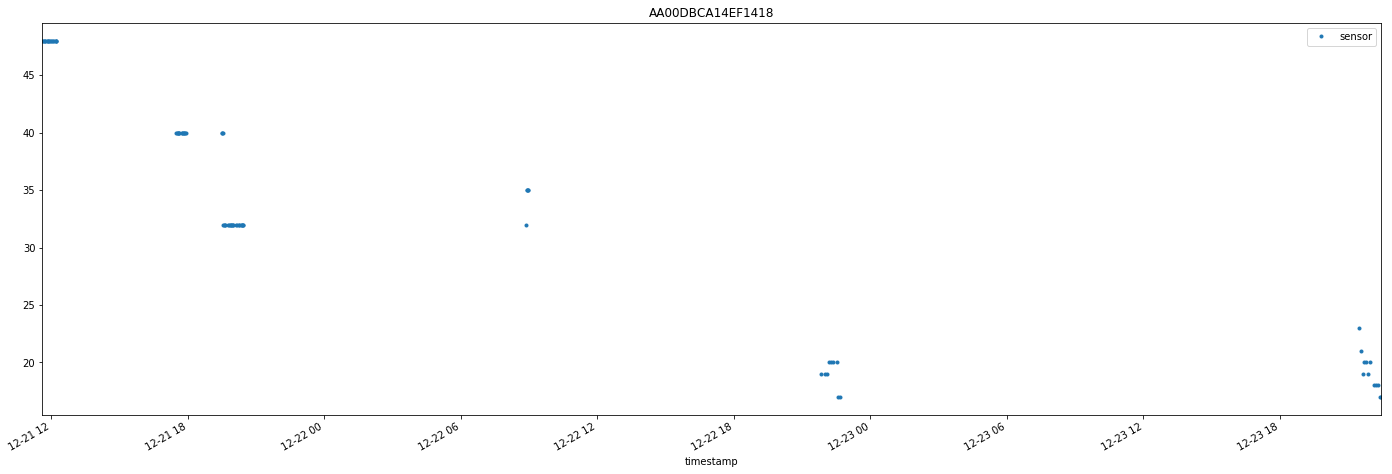

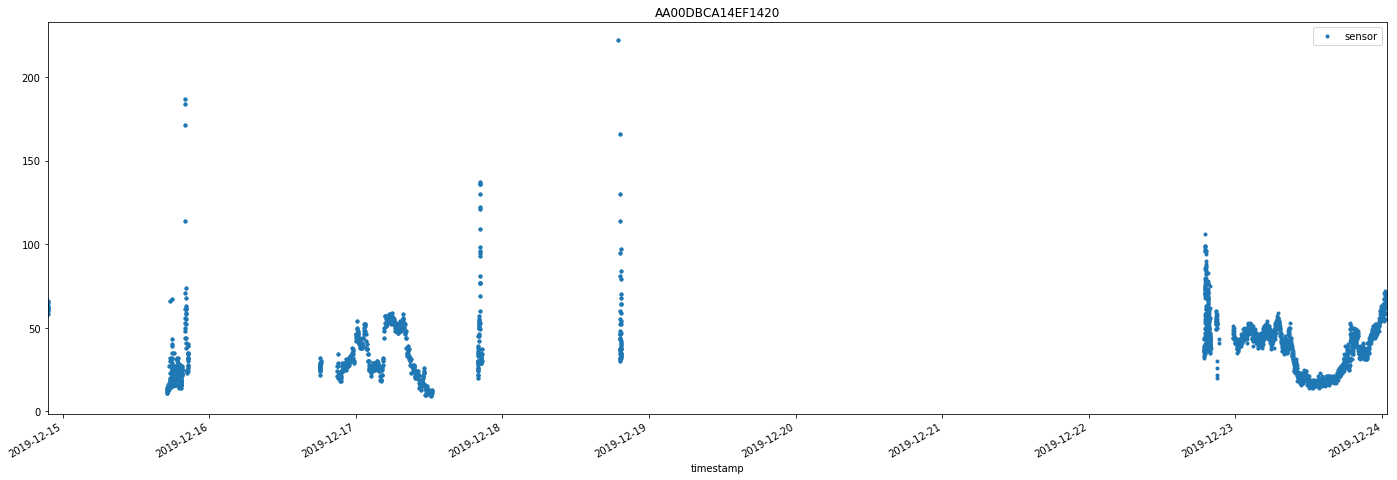

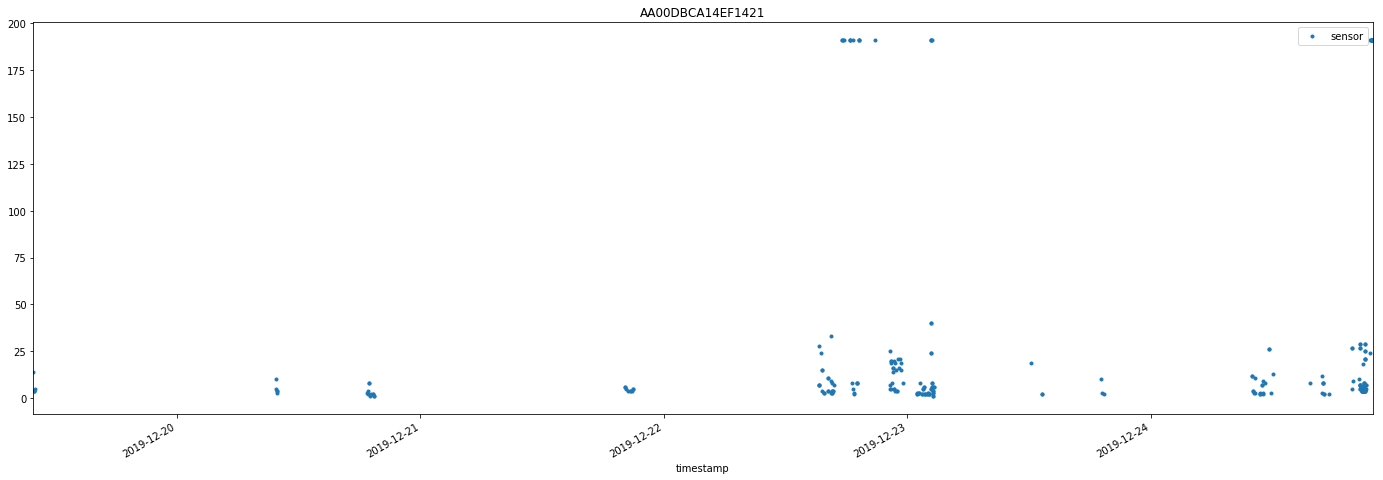

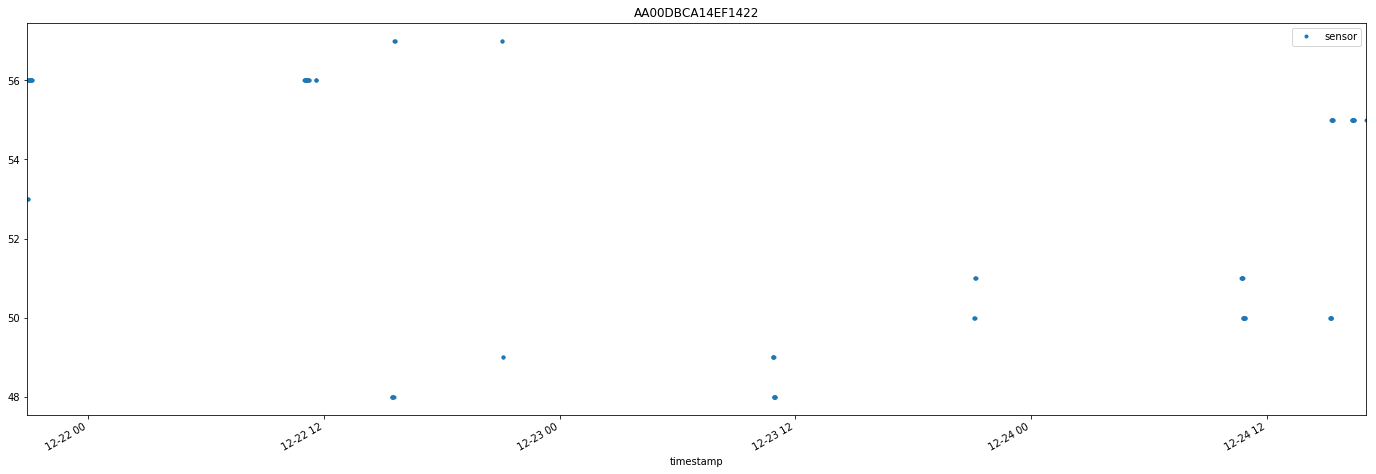

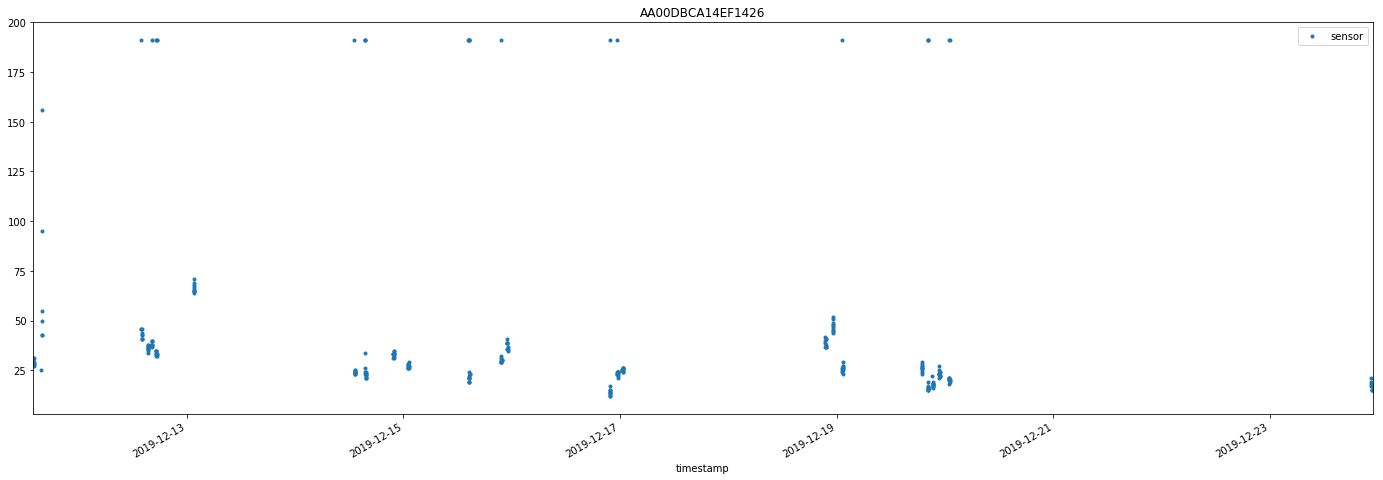

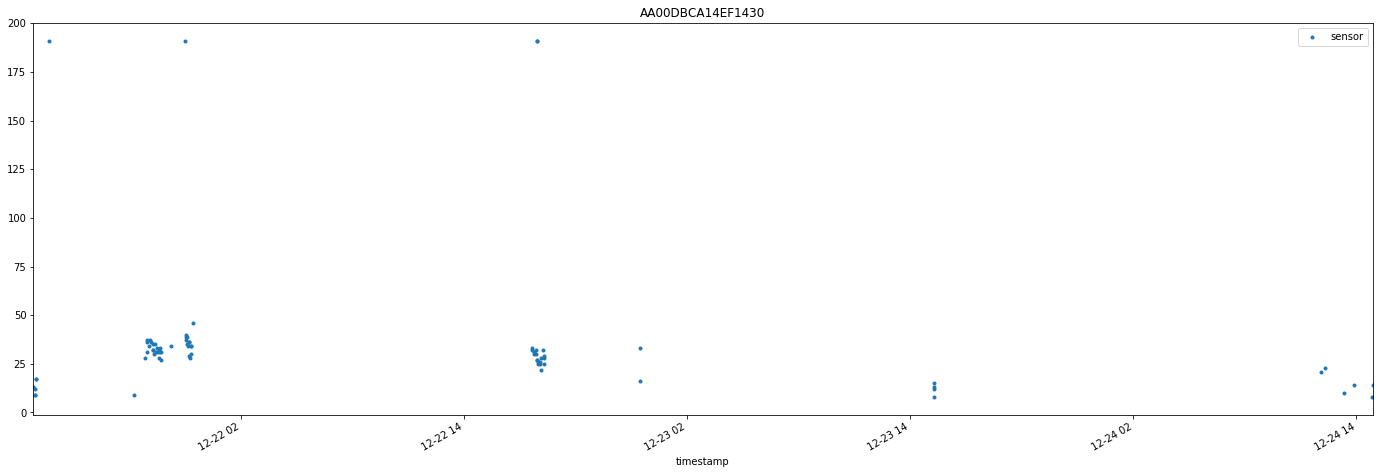

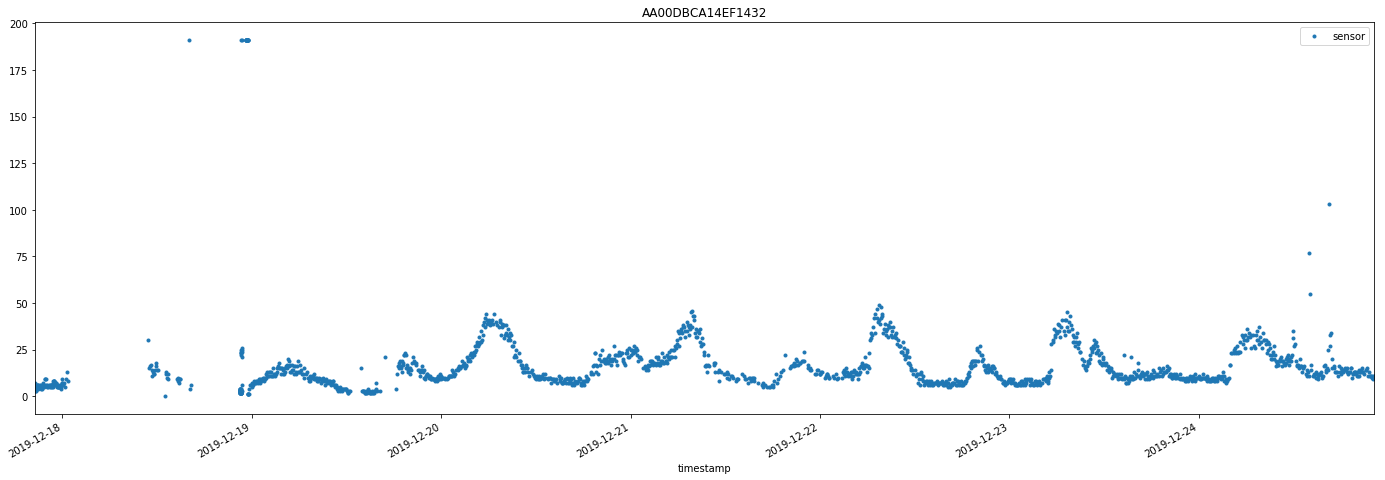

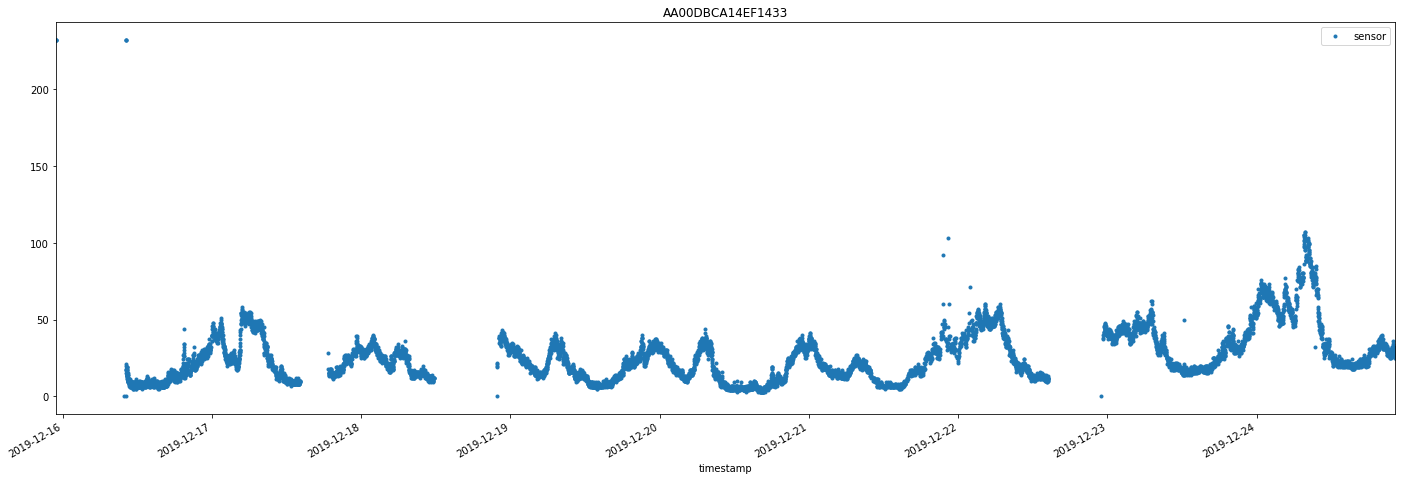

In [10]:
device_sensor = sensor_df.groupby('DevEUI').apply(
    lambda device: device.sort_values('timestamp')[['timestamp', 'sensor']]
    .plot(x='timestamp', y='sensor', style='.', title=device.name, figsize=(24, 8)))

/usr/local/lib/python3.7/site-packages/matplotlib/axes/_base.py:3124: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=357.0, right=357.0
  'left=%s, right=%s') % (left, right))


DevEUI
AA00DBCA14EF1401    AxesSubplot(0.125,0.125;0.775x0.755)
AA00DBCA14EF1403    AxesSubplot(0.125,0.125;0.775x0.755)
AA00DBCA14EF1406    AxesSubplot(0.125,0.125;0.775x0.755)
AA00DBCA14EF1407    AxesSubplot(0.125,0.125;0.775x0.755)
AA00DBCA14EF1414    AxesSubplot(0.125,0.125;0.775x0.755)
AA00DBCA14EF1418    AxesSubplot(0.125,0.125;0.775x0.755)
AA00DBCA14EF1420    AxesSubplot(0.125,0.125;0.775x0.755)
AA00DBCA14EF1421    AxesSubplot(0.125,0.125;0.775x0.755)
AA00DBCA14EF1422    AxesSubplot(0.125,0.125;0.775x0.755)
AA00DBCA14EF1426    AxesSubplot(0.125,0.125;0.775x0.755)
AA00DBCA14EF1430    AxesSubplot(0.125,0.125;0.775x0.755)
AA00DBCA14EF1432    AxesSubplot(0.125,0.125;0.775x0.755)
AA00DBCA14EF1433    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

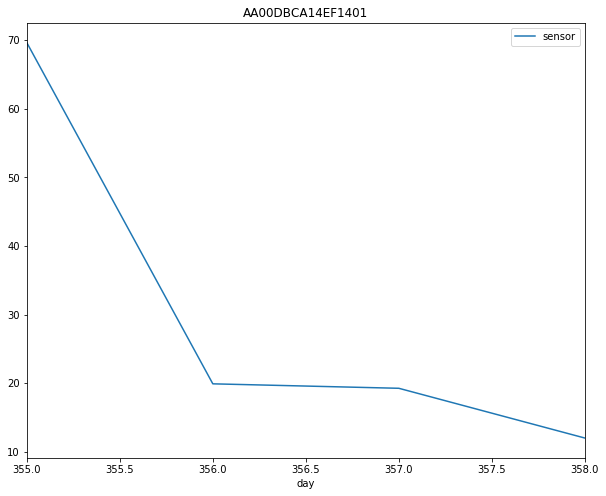

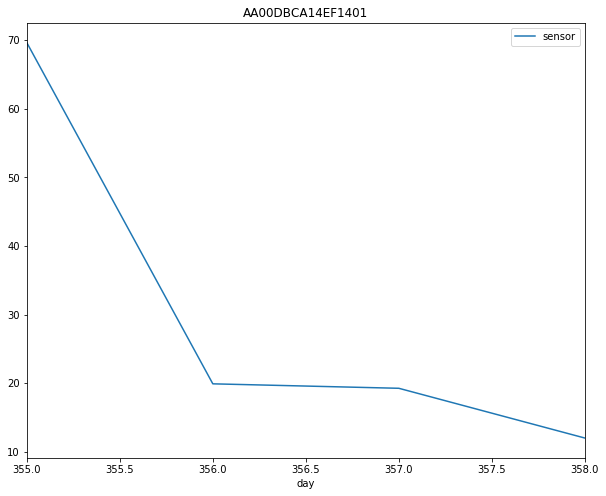

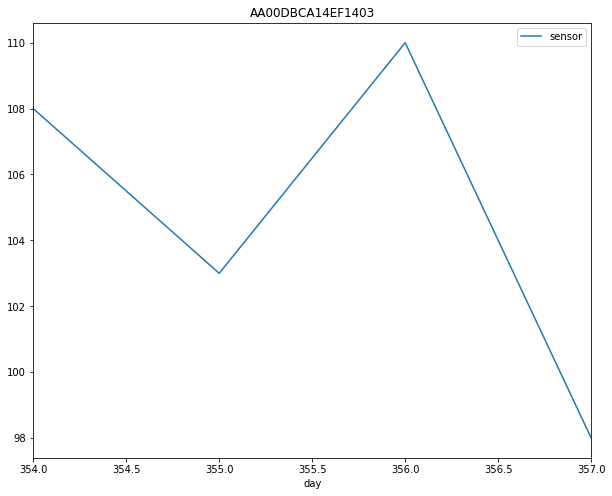

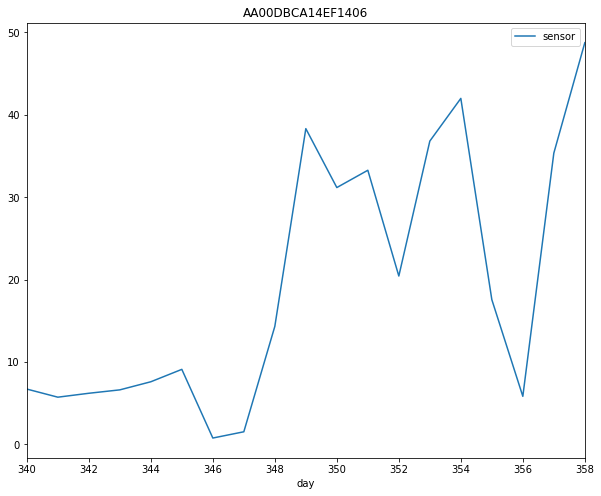

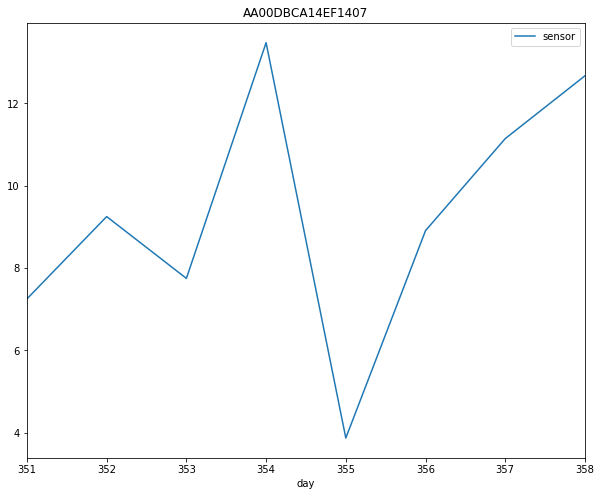

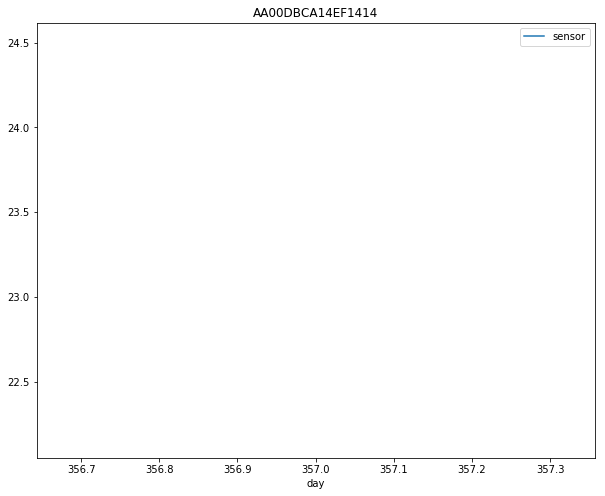

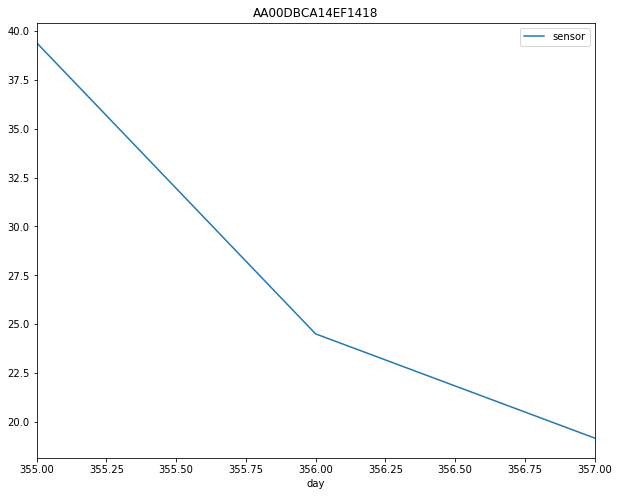

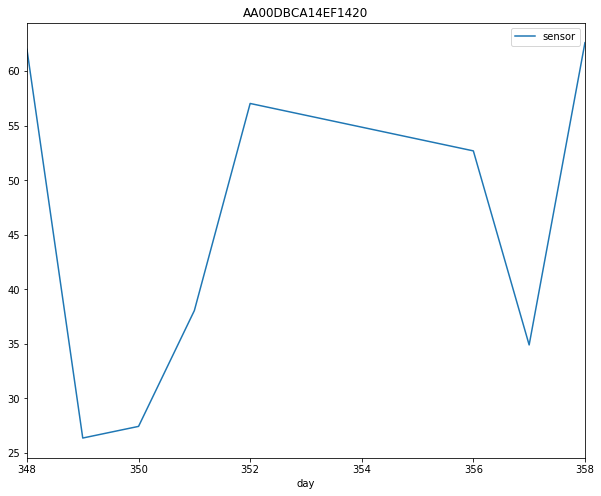

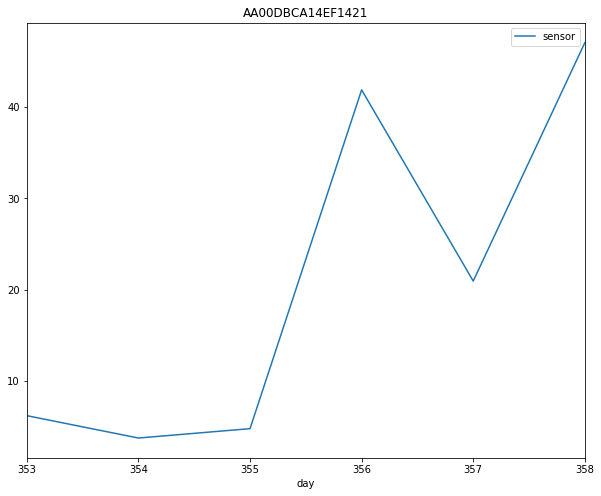

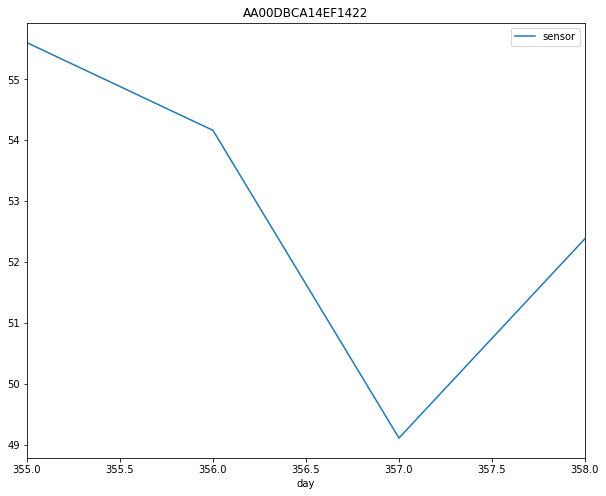

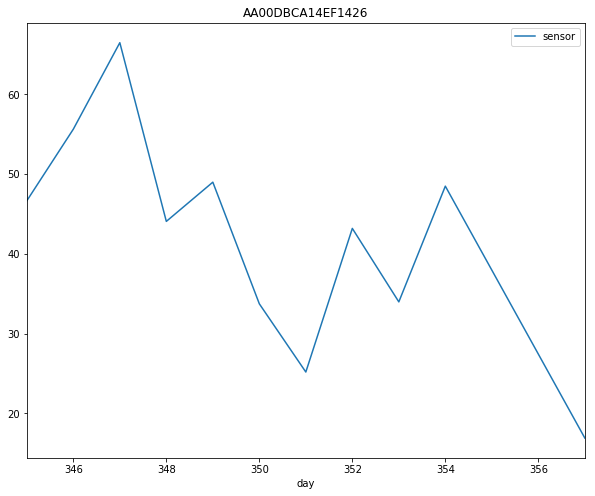

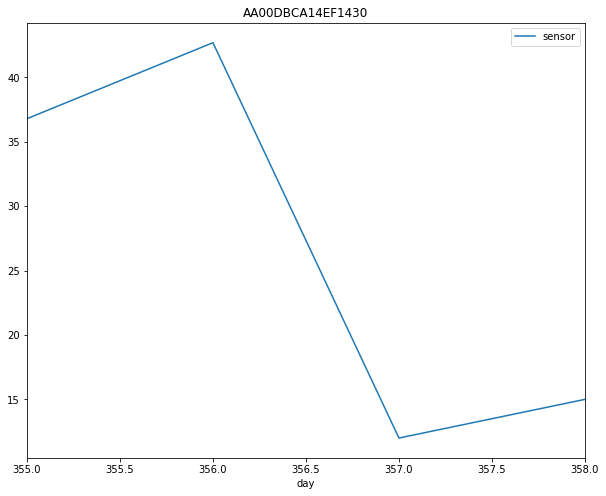

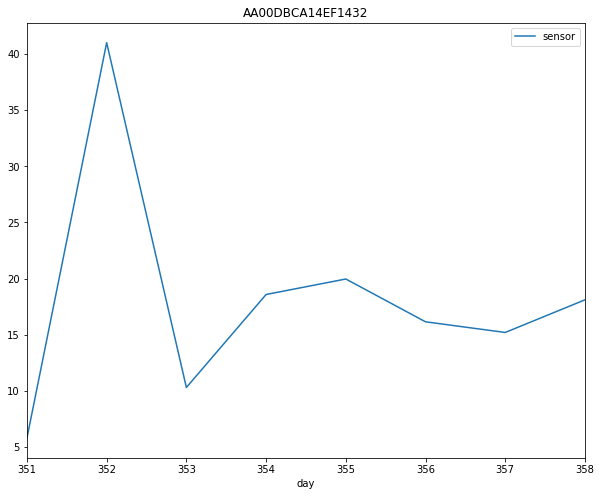

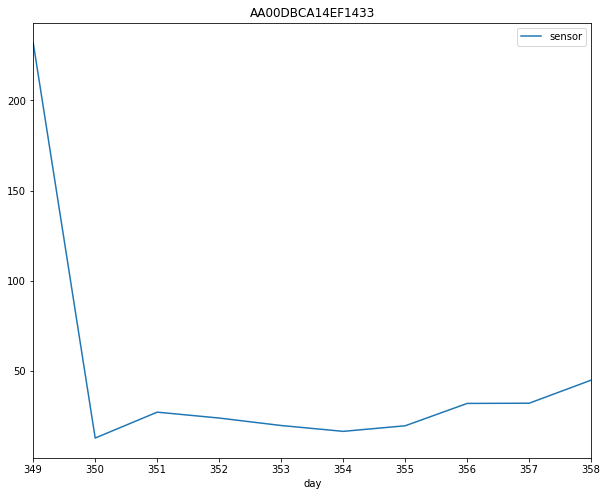

In [11]:
sensor_df.groupby(['DevEUI', 'day']).mean().reset_index().groupby(['DevEUI']).apply(
    lambda device: device.sort_values('day')[['day', 'sensor']]
    .plot(x='day', y='sensor', kind='line', title=device.name, figsize=(10, 8)))